<a href="https://colab.research.google.com/github/RJRS/Prediction-of-quality-of-Wine/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_06%EF%BC%9A%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E5%88%86%E9%A1%9E%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **建立第一個 Baseline 版本**

### 資料來源：https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

1. 在你的 Colab 程式碼中載入 `winequality-red.csv` 資料集，可以參考這一篇 教學。
2. 請瞭解該資料中所有欄位的定義為何？


In [1]:
import pandas as pd
import numpy as np

In [2]:
url ="https://raw.githubusercontent.com/RJRS/Prediction-of-quality-of-Wine/945be81bac9f45c3007993caaad8a139898563cc/winequality-red.csv"
df1 = pd.read_csv(url)

In [3]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


> 大多數的酒內酸分為固定酸(Fixed Acids、又稱非揮發性酸)和揮發性酸(Volatile Acids)

1. fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

> 非揮發性的酸、固定酸度

2. volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

> 葡萄酒中乙酸的含量，含量過高會有令人不快的醋味

3. citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

> 少量酒中含有檸檬酸，可以增加葡萄酒的“新鮮度”和風味

4. residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

> 殘糖, 醱酵停止後剩餘的糖量，很少發現殘糖低於1克/升的葡萄酒，大於45克/升的葡萄酒認為是甜的

5. chlorides: the amount of salt in the wine

> 氯化物：葡萄酒中鹽的含量

6. free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

> 游離態二氧化硫： 游離的二氧化硫 SO2- 與 二氧化硫氣體（溶於水中）和 亞硫酸氫根離子 HSO3- 之間處於平衡狀態；可以防止微生物生長和葡萄酒的氧化

7. total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

> 總二氧化硫：游離的二氧化硫 SO2- 與 二氧化硫氣體 的總量；在低濃度下，葡萄酒中幾乎檢測不到 SO2，但在游離二氧化硫濃度超過 50 ppm 時，用鼻子就能聞出SO2的氣味。

8. density: the density of water is close to that of water depending on the percent alcohol and sugar content

> 密度：水的密度接近於水的密度，取決於酒精和糖含量的百分比

9. pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

> pH值：葡萄酒的酸性或鹼性程度，從 0（非常酸性）到 14（非常鹼性）；大多數葡萄酒的 pH 值在 3-4 之間

10. sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant 

> 硫酸鹽：葡萄酒添加劑，會提高二氧化硫氣體 (SO2) 水平，可抗菌及抗氧化劑的作用

11. alcohol: the percent alcohol content of the wine

> 酒精含量百分比

12. quality：output variable (based on sensory data, score between 0 and 10)

> 品質：主觀評分，0 - 10

### 3. 檢視每個數值型欄位值的範圍是否相同。

In [4]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 4. 進一步觀察其他「數值欄位/類別欄位」的屬性與「quality」之關係程度，找出關係大的欄位。

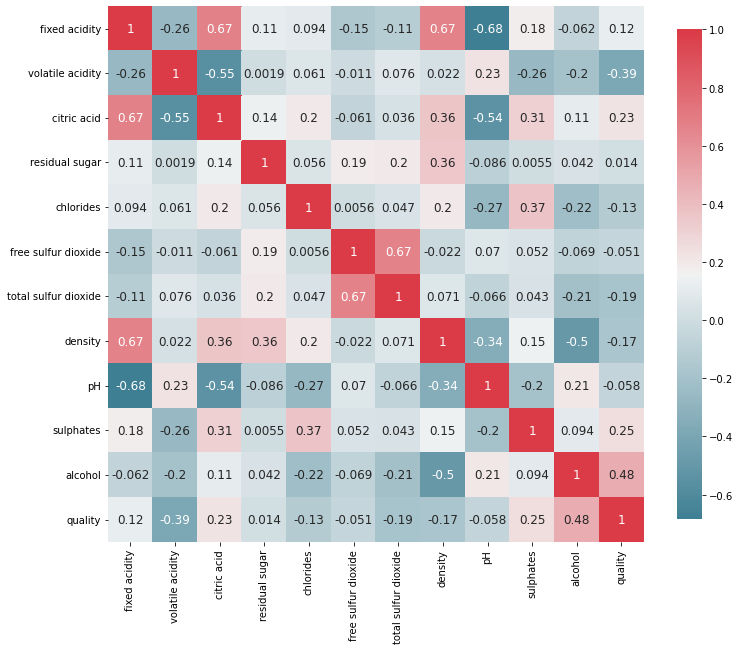

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df1.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)

*   正相關，相關係數高的有：alcohol、sulphates
*   負相關，相關係數高的有：volatile acidity



5. 檢查資料分為「good」和「bad」後，是否有資料不平衡問題？

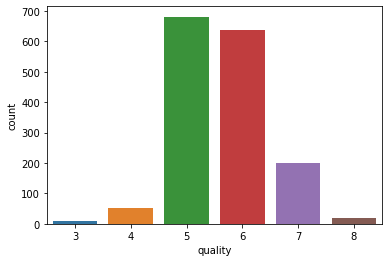

In [12]:
sns.countplot(x='quality', data=df1)

In [13]:
# 將資料視覺化以後，可以觀察到quality大多落在5-6，可以先將資料分成bad: 3-4, medium: 5-6, good: 7-8

### 6. 請進行「必要」的資料前處理操作，讓資料變成可以跑得動模型的格式即可。
### 7. 最後請將資料接著執行下方範例，看看能否產出結果呢。

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df1.drop('quality', axis = 1)
y = df1['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
rfc_eval

array([0.6640625 , 0.68359375, 0.6484375 , 0.6796875 , 0.74509804])

# 運用資料與特徵優化分析

### 1. 延續昨天的觀察，找出欄位中與「紅酒品質」找出關係比較大的欄位有哪些？你是如何定義「關係大」的呢？ （Hint: 可以利用視覺化圖表、 correlation、feature importance 等方法）

同昨日之熱力圖

### 2. 請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？

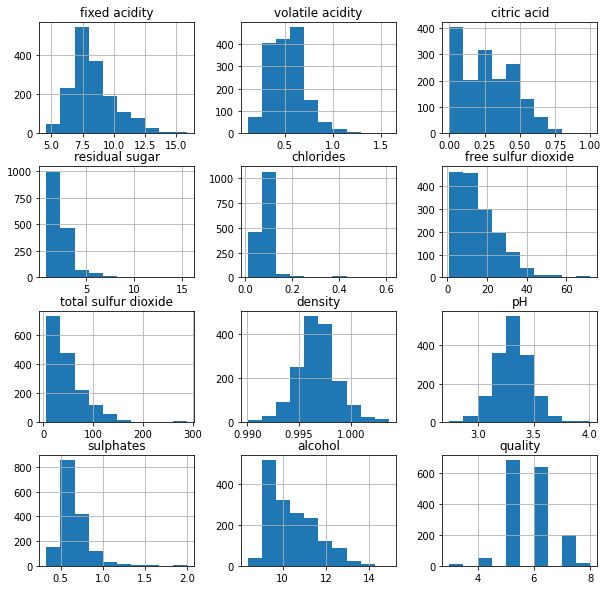

In [26]:
df1.hist(figsize=(10,10))
plt.show()
# 好像沒有需要去除的欄位

### 3. 請你針對「數值型」的幾個欄位，嘗試比較不同的正規化方法（Standardize、Min-Max Normalization）？

In [32]:
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(df1)
new_df1 = norm_fit.transform(df1)

In [41]:
# display values
new_df1 = pd.DataFrame(new_df1)
new_df1.columns = df1.columns 
new_df1
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB







4. 請問「不平衡」的類別資料可能會造成怎樣的影響，也請你試著去解決不平衡的問題。

5. 請你嘗試不同的特徵工程手法，產生可以幫助分析結果的新變數。

In [ ]:
# 這兩題可能要等老師解題

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = new_df1.drop('quality', axis = 1)
y = new_df1['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
rfc_eval

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 367, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 734, in _validate_y_class_weight
    check_classification_targets(y)
  File "/usr

array([nan, nan, nan, nan, nan])